In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import sys
sys.path.append('C:/Users/Petr.Yurchenko/McKinsey_Severstal_Hack_2022')

from server2022.src.train_val import *
from server2022.src.model import *
from server2022.data.processed.prepare_data import *

In [2]:
# agents2019 = pd.read_csv('../data/raw/agents2019.csv', index_col='Unnamed: 0')
# agents2020 = pd.read_csv('../data/raw/agents2020.csv')
# for c in [col for col in agents2020.columns if 'Факт' in col]:
#     agents2020[c] = agents2020[c].apply(lambda x: float(x) if x not in ['Х', 'Н/Д'] else np.nan)
# agents2021 = pd.read_csv('../data/raw/agents2021.csv', index_col='Unnamed: 0')

# cbr = pd.read_csv('../data/raw/cbr.csv')
# inflation = pd.read_csv('../data/raw/inflation.csv')

In [3]:
#df = create_df_0years_known()
df = create_df_1year_known()

In [4]:
feat_gen = Feature_gen(-4, -1)
df = feat_gen.preprocessing_before_fitting(df)
df = df.loc[:, [col for col in df.columns if 'Факт' not in col]]
# df = df.fillna(0)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
new_cols = []
for col in df.columns:
    for m in ['Основные средства', 
            'Внеоборотные активы',
            'Дебиторская задолженность',
            'Оборотные активы',
            'Кредиторская задолженность',
             'Краткосрочные обязательства']:
        if m in col:
            new_cols.append(col)

In [5]:
new_cols

['-4, Основные средства , RUB',
 '-3, Основные средства , RUB',
 '-2, Основные средства , RUB',
 '-1, Основные средства , RUB',
 '-4, Внеоборотные активы, RUB',
 '-3, Внеоборотные активы, RUB',
 '-2, Внеоборотные активы, RUB',
 '-1, Внеоборотные активы, RUB',
 '-4, Дебиторская задолженность, RUB',
 '-3, Дебиторская задолженность, RUB',
 '-2, Дебиторская задолженность, RUB',
 '-1, Дебиторская задолженность, RUB',
 '-4, Оборотные активы, RUB',
 '-3, Оборотные активы, RUB',
 '-2, Оборотные активы, RUB',
 '-1, Оборотные активы, RUB',
 '-4, Кредиторская задолженность, RUB',
 '-3, Кредиторская задолженность, RUB',
 '-2, Кредиторская задолженность, RUB',
 '-1, Кредиторская задолженность, RUB',
 '-4, Краткосрочные обязательства, RUB',
 '-3, Краткосрочные обязательства, RUB',
 '-2, Краткосрочные обязательства, RUB',
 '-1, Краткосрочные обязательства, RUB',
 'Основные средства  ,прирост за -3 год',
 'Основные средства  ,прирост за -2 год',
 'Основные средства  ,прирост за -1 год',
 'Внеоборотные

In [5]:
new_cols = new_cols + ['Наименование ДП', 'Итого', 'year', 'binary_target'] + \
['Макс. ПДЗ за -1 год, дней',
 'Сред. ПДЗ за -1 год, дней',
 'Кол-во просрочек свыше 5-ти дней за -1 год, шт.',
 'Общая сумма ПДЗ свыше 5-ти дней за -1 год, руб.']
df_new = df[new_cols]

Fitting model <catboost.core.CatBoostClassifier object at 0x000002398D2C8B20> with treshold = 0.5...


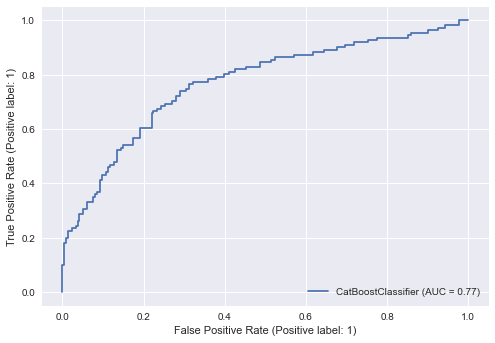

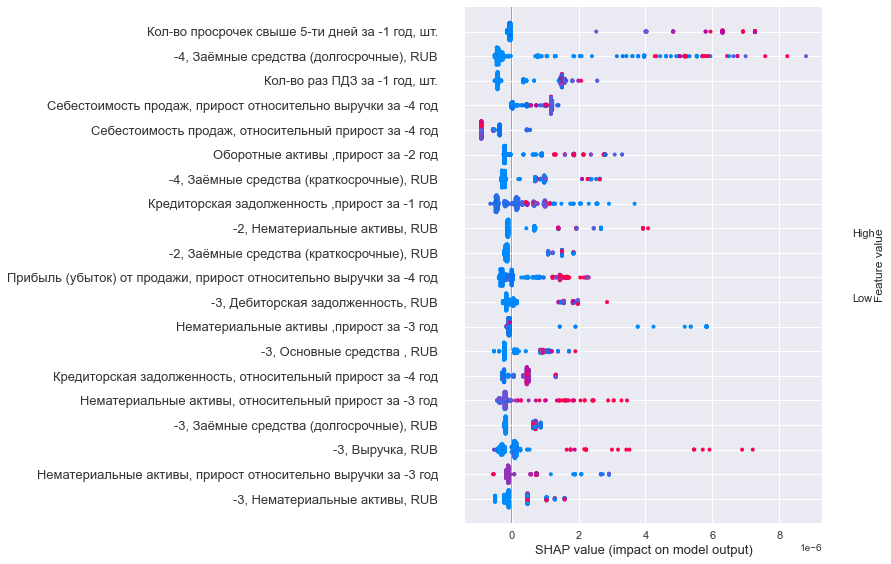

F1 = 0.1026, Precision = 1.0, Recall = 0.0541, Accuracy = 0.6769, ROC_AUC = 0.7684
55


In [35]:
from sklearn.linear_model import LogisticRegression

model = CatBoostClassifier(iterations=1000,
                           depth=3, 
                           # l2_leaf_reg=5, 
                           learning_rate=1e-6,
                           loss_function='Logloss',
                           use_best_model=True,
                           eval_metric='AUC',
                           verbose=False,
                           class_weights=[1, 0.01], # (df.shape[0] - df.binary_target.sum()) / df.binary_target.sum()],
                           # cat_features=cat_features
                          )

# model = RandomForestClassifier(n_estimators=30)
# model = LogisticRegression(penalty='l2', C=1e-1, class_weight=[1, 1e-4])
make_report(model, df, treshold=0.4999631563571763, to_file=False, file_path='../reports/report_petr.csv', create_new_clients=True)
print(model.best_iteration_)

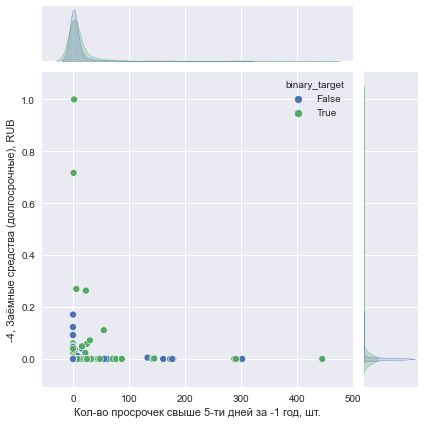

In [37]:
sns.jointplot(data=df, x='Кол-во просрочек свыше 5-ти дней за -1 год, шт.', y='-4, Заёмные средства (долгосрочные), RUB', hue='binary_target')

Fitting model <catboost.core.CatBoostClassifier object at 0x000001F41CE23970> with treshold = 0.6...


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zer

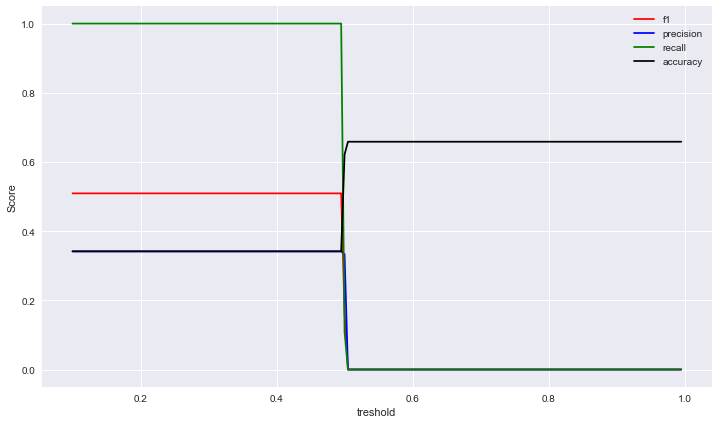

In [9]:
model = CatBoostClassifier(iterations=1000,
                           # depth=6.0, 
                           # l2_leaf_reg=4.17, 
                           learning_rate=1e-6,
                           loss_function='Logloss',
                           use_best_model=True,
                           eval_metric='F1',
                           verbose=False,
                           class_weights=[1, 1e-3],
                          )

#model = RandomForestClassifier(n_estimators=30)
validate_treshold(model, df)

In [22]:
X_train, X_test, y_train, y_test = data_split(df)

In [36]:
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

In [30]:
probas = model.predict_proba(X_test)[:, 1]

In [31]:
best = 0
xx = 0
for x in sorted(probas):
    pr = precision_score(y_test, probas >= x)
    rl = recall_score(y_test, probas >= x)
    best_ = pr * rl
    if best_ >= best:
        best = best_
        xx = x


In [32]:
xx

0.4999492273788739

In [33]:
precision_score(y_test, probas >= xx), recall_score(y_test, probas >= xx)

(0.5971223021582733, 0.7477477477477478)